<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-salud/blob/main/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Librerias generales
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Lectura de base de datos
df = pd.read_csv('/content/drive/MyDrive/analitica3/Salud/df_sel.csv')
y_sc = pd.read_csv('/content/drive/MyDrive/analitica3/Salud/y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
y_sc.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
df

,year_egreso,mes_egreso,servicio_habilitado,modalidad_contrato,via_ingreso,unidad_estrategica,tipo_egreso,transfusion_sangre,antibiotico,tipo_diagnostico_principal,...,indice_de_fragilidad_groningen,glicemia,hemoglobina_glicada,lipoproteina,colesterol_total,trigliceridos,tasa_de_filtracion_glomerular_tfg,microalbuminuria,hormona_estimulante_de_la_tiroides_(tsh),cambio_de_tfg
0,0.0,0.272727,0.50,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,...,0.133333,0.000000,0.072439,0.635347,0.724271,0.140713,0.082208,0.009098,0.206737,0.332751
1,0.0,0.272727,0.75,0.0,1.0,1.000000,1.0,0.0,1.0,0.0,...,0.466667,0.000000,0.000000,0.000000,0.494915,0.104392,0.053463,0.000000,0.000000,0.332751
2,0.0,0.272727,0.50,0.0,0.5,0.333333,0.0,0.0,0.0,1.0,...,0.133333,0.097292,0.049593,0.651287,0.705424,0.100360,0.039972,0.000893,0.089168,0.338766
3,0.0,0.272727,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,...,0.066667,0.000000,0.058130,0.301980,0.477966,0.088553,0.069530,0.002363,0.000000,0.332751
4,0.0,0.272727,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,...,0.533333,0.085256,0.052033,0.000000,0.424407,0.060187,0.022718,0.000582,0.218956,0.316453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,0.0,0.181818,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,...,0.133333,0.086259,0.047480,0.197277,0.451864,0.083369,0.112278,0.000059,0.021466,0.360885
1291,0.0,0.181818,0.50,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,...,0.666667,0.078235,0.046829,0.000000,0.411186,0.032973,0.037234,0.000019,0.040621,0.332751
1292,0.0,0.181818,1.00,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,...,0.533333,0.078235,0.049837,0.000000,0.569492,0.086393,0.104789,0.000141,0.022457,0.332751
1293,0.0,0.181818,0.75,0.0,1.0,1.000000,1.0,0.0,0.0,0.0,...,0.800000,0.119358,0.055935,0.000000,0.721356,0.069618,0.035784,0.000111,0.715984,0.332751


In [27]:
y_sc

,tiempo_estancia
0,0.033741
1,0.003575
2,0.131474
3,0.073257
4,0.039184
...,...
1290,0.027024
1291,0.039936
1292,0.020086
1293,0.002234


# <h1> Elección de modelos mediante CrossValidation

In [28]:
#Creacion modelo Regresión lineal
#m_lr = LinearRegression()

#Creacion modelo Gradient Boosting Regression
m_gbr = ensemble.GradientBoostingRegressor()

#Creacion modelo Decision Tree Regression
m_dtr = DecisionTreeRegressor()

#Creacion modelo Support Vector Machine Regression
m_svr=SVR()

#Creacion modelo Random Forest Regression
m_rfr=RandomForestRegressor()

#Creacion modelo LightGBM
m_lgb=lgb.LGBMRegressor()

#lista de modelos
m=([ m_gbr, m_dtr,m_svr,m_rfr,m_lgb])

In [29]:
def medir_modelos(modelos, scoring, X, y, cv):
    metric_modelos = pd.DataFrame()
    for i, modelo in enumerate(modelos):
        scores = cross_val_score(modelo, X, y, scoring=scoring, cv=cv)
        col_name = f'm{i + 1}_{modelo.__class__.__name__}'  # Nombre de columna con número de modelo y nombre del modelo
        pdscores = pd.DataFrame(scores, columns=[col_name])
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)
    return metric_modelos


rmse1 = medir_modelos(m, 'neg_mean_squared_error', df, y_sc, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 56
[LightGBM] [Info] Start training from score 0.079121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2707
[LightGBM] [Info] Number of data points in the train set: 971, number of used features: 56
[LightGBM] [Info] Start training from score 0.081016
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2

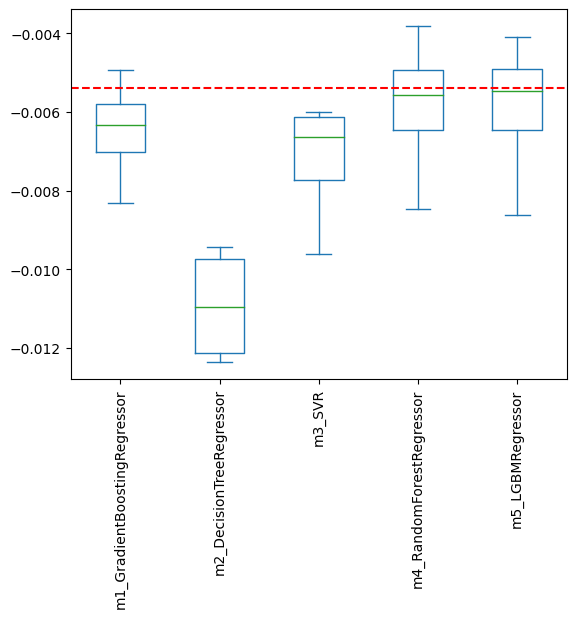

In [30]:
# Crear el gráfico de caja
ax = rmse1.plot(kind='box')
ax.axhline(y=-0.0054, color='r', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Mostrar el gráfico
plt.show()

# <h1> Prueba de modelos para ver sus métricas en testeo

In [31]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(df,y_sc,test_size=0.3,random_state=0)

# <h1> LGBMRegressor

In [32]:
#Creacion modelo LGBMRegressor
m_lgb=lgb.LGBMRegressor()
m_lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 906, number of used features: 56
[LightGBM] [Info] Start training from score 0.083391


LGBMRegressor()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos
scaler.fit(y)

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_lgb.predict(X_train).ravel()

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_lgb.predict(X_test).ravel()

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train_o = scaler.inverse_transform(y_pred_train.reshape(-1, 1))

y_test_o = scaler.inverse_transform(y_test)
y_pred_test_o = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.012372824299912967
Train - RMSE: 0.02691357078568061
Test - MAE: 0.047989405344637616
Test - RMSE: 0.06888031524894653


# <h1> GradientBoostingRegressor

In [34]:
m_gbr = ensemble.GradientBoostingRegressor()
m_gbr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_gbr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_gbr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.03069739254289417
Train - RMSE: 0.042747568486167606
Test - MAE: 0.04790624676496406
Test - RMSE: 0.07117629867604464


# <h1> DecisionTreeRegressor

In [36]:
m_dtr = DecisionTreeRegressor()
m_dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_dtr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_dtr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.0
Train - RMSE: 0.0
Test - MAE: 0.06040291193435444
Test - RMSE: 0.09600490137796812


# <h1> SVR

In [38]:
m_svr=SVR()
m_svr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_svr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_svr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.056758228092698086
Train - RMSE: 0.06759052121225877
Test - MAE: 0.06549910197965338
Test - RMSE: 0.08410490284386185


# <h1> RandomForestRegressor

In [40]:
m_rfr=RandomForestRegressor()
m_rfr.fit(X_train,y_train)

<ipython-input-40-d7249b9f6ff0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m_rfr.fit(X_train,y_train)


RandomForestRegressor()

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.017983895744013698
Train - RMSE: 0.03044025376949175
Test - MAE: 0.048455674001401605
Test - RMSE: 0.07264131721967503
